process meta information


In [ ]:
import pandas as pd 
import numpy as np
meta_data = pd.read_json('/data/shith/amazon_book/meta_Books.json', lines = True)

In [ ]:
print(meta_data.head(5))
print(meta_data.columns)

In [ ]:
book_data = pd.read_json('/data/shith/amazon_book/Books_5.json', lines = True)
print(book_data.head(5))
print(book_data.columns)

In [ ]:
all_data = pd.merge(meta_data, book_data, how = 'right', on= 'asin')

In [ ]:
print(all_data.columns)
all_data = all_data.loc[:,['asin', 'title', 'reviewerID', 'unixReviewTime', 'overall']]
# print(all_data.isnull())

In [ ]:
null_counts = all_data.isnull().sum()
print(null_counts)

In [ ]:
all_data = all_data.dropna(axis=0)  # 删除包含空值的行
null_counts = all_data.isnull().sum()
print(null_counts)

In [ ]:
print(all_data.head(5))
all_data.to_hdf('/data/shith/amazon_book/amazon_book.hdf', key = '5-core')

preserve_part_df_and_part_user

In [ ]:
import pandas as pd
import numpy as np
all_df = pd.read_hdf('/data/shith/amazon_book/amazon_book.hdf')

In [65]:
df = all_df.copy()
df['overall'] = df['overall'].apply(lambda x: int(int(x>3)))
max_time = df['unixReviewTime'].max()
min_time = df['unixReviewTime'].min()
print(f"最大时间：{max_time}")
print(f"最小时间：{min_time}")
from datetime import datetime
print(datetime.utcfromtimestamp(max_time).strftime('%Y-%m-%d %H:%M:%S'))
print(datetime.utcfromtimestamp(min_time).strftime('%Y-%m-%d %H:%M:%S'))
user_counts = df['reviewerID'].value_counts()
print(user_counts)
# # 筛选出评价产品数大于等于10的用户
ten_core_users = user_counts[(user_counts >= 11)]
print(ten_core_users)

最大时间：1538438400
最小时间：832550400
2018-10-02 00:00:00
1996-05-20 00:00:00
A2F6N60Z96CAJI    8917
A2OJW07GQRNJUT    5901
AHUT55E980RDR     5799
A328S9RN3U5M68    5296
A1JLU5H1CCENWX    3821
                  ... 
A3NILEEBP65H1V       2
A2Y59LS8W4PW3Y       2
AFLCR5LX34TYK        2
A1O1E7R71BVH9K       1
AGO95BGHQTQ5T        1
Name: reviewerID, Length: 1856344, dtype: int64
A2F6N60Z96CAJI    8917
A2OJW07GQRNJUT    5901
AHUT55E980RDR     5799
A328S9RN3U5M68    5296
A1JLU5H1CCENWX    3821
                  ... 
A3G7COJM3OAE06      11
A3FNALYQQKCV47      11
A1Z1CA3B6I2XNB      11
A1NZNWX58WMP7W      11
A32D7G5WWQ4DGX      11
Name: reviewerID, Length: 636497, dtype: int64


In [122]:
sample_size = int(len(ten_core_users) * 0.2)
sampled_users = ten_core_users.sample(n=sample_size, random_state=0)

# 筛选出采样后的数据
sampled_df = df.loc[df['reviewerID'].isin(sampled_users.index), :]
print(sampled_df.shape)

(3806483, 5)


In [123]:
user_counts_sample = sampled_df['reviewerID'].value_counts()
print(user_counts_sample)

A1D2C0WDCSHUWZ    3778
A1M8PP7MLHNBQB    2707
A22B13EJTZKCTM    2478
A25KKXUQQ0OLWB    2354
A3GWE80SUGORJD    2209
                  ... 
A9YQGKO2PKRDB       11
A29BYOJ7K2ZJAK      11
A1OQ7AXAERZMHZ      11
A1FVUQHV0JUILT      11
A395N4YTYU0UUF      11
Name: reviewerID, Length: 127299, dtype: int64


In [124]:
import datetime

# 假设min_time和max_time是您的日期时间字符串
min_time_human = "2014-01-01 00:00:00"
max_time_human = "2018-03-01 00:00:00"

# 将人类可读时间转换为UNIX时间戳
min_time_unix = int(datetime.datetime.strptime(min_time_human, '%Y-%m-%d %H:%M:%S').timestamp())
max_time_unix = int(datetime.datetime.strptime(max_time_human, '%Y-%m-%d %H:%M:%S').timestamp())

print(f"最小UNIX时间为: {min_time_unix}")
print(f"最大UNIX时间为: {max_time_unix}")


最小UNIX时间为: 1388505600
最大UNIX时间为: 1519833600


/tmp/ipykernel_910086/1092043061.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df['time_periods'] = pd.cut(sampled_df['unixReviewTime'], bins=time_range, include_lowest=True)
/data/shith/anaconda3/envs/pytorch/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/data/shith/anaconda3/envs/pytorch/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/data/shith/anaconda3/envs/pytorch/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37327 

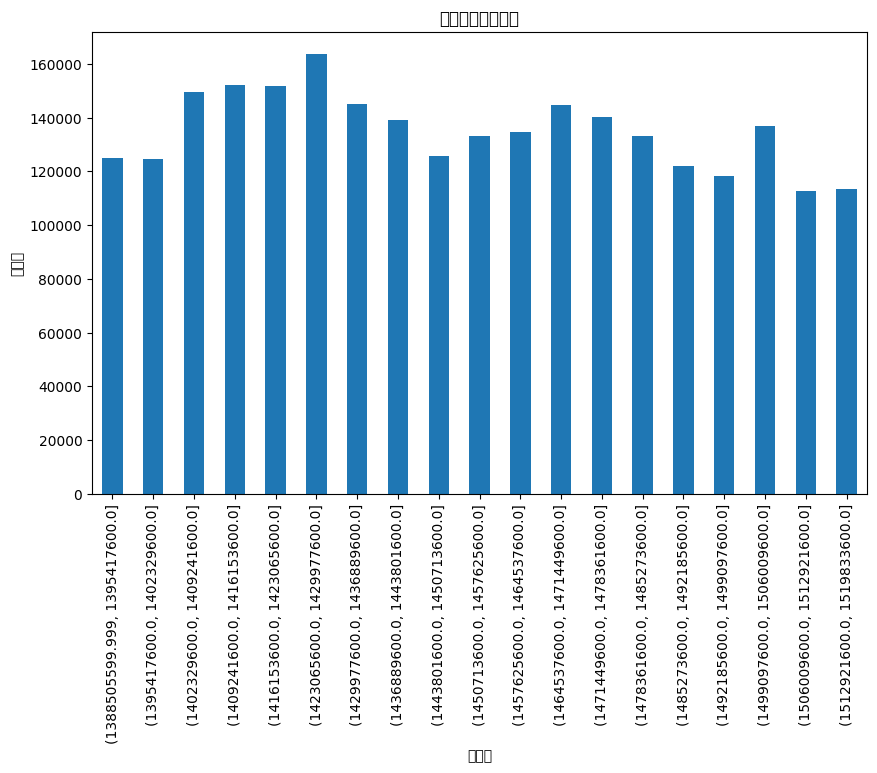

In [125]:
# 划分20个时段
# sampled_data
import matplotlib.pyplot as plt
min_time = min_time_unix # sampled_df['unixReviewTime'].min()
max_time = max_time_unix # sampled_df['unixReviewTime'].max()
time_range = np.linspace(min_time, max_time, 20)

# 根据时间范围划分时段
sampled_df['time_periods'] = pd.cut(sampled_df['unixReviewTime'], bins=time_range, include_lowest=True)

# 绘制每个时段的数据量图表
counts_per_period = sampled_df['time_periods'].value_counts().sort_index()
counts_per_period.plot(kind='bar', figsize=(10, 6))
plt.title('每个时段的数据量')
plt.xlabel('时间段')
plt.ylabel('数据量')
plt.show()

In [126]:
sampled_df.drop(labels='time_periods', inplace=True, axis=1)

/tmp/ipykernel_910086/1762283620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df.drop(labels='time_periods', inplace=True, axis=1)


In [127]:
cnt_title = sampled_df['title'].value_counts()
title_20_list = cnt_title[(cnt_title >= 50)].index.tolist()
sampled_df_20_core = sampled_df.loc[sampled_df['title'].isin(title_20_list),:]
print(cnt_title)
print(sampled_df_20_core['title'].value_counts())

The Pillars of the Earth                                3540
The Girl on the Train                                   3090
Gone Girl                                               2408
Divergent                                               2172
The Nightingale: A Novel                                1983
                                                        ... 
The Vulture Fund                                           1
Blossoms                                                   1
Deadly Harvest                                             1
Mindblindness: An Essay on Autism and Theory of Mind       1
 The Lusca eBook                                           1
Name: title, Length: 539903, dtype: int64
The Pillars of the Earth                          3540
The Girl on the Train                             3090
Gone Girl                                         2408
Divergent                                         2172
The Nightingale: A Novel                          1983
            

In [128]:
print(sampled_df_20_core)

                asin                                              title  \
1418      0001720392                                 Green Eggs and Ham   
1422      0001720392                                 Green Eggs and Ham   
1443      0001720392                                 Green Eggs and Ham   
1447      0001720392                                 Green Eggs and Ham   
1453      0001720392                                 Green Eggs and Ham   
...              ...                                                ...   
27175024  B01EXLQ8DY  Blind Descent: Surviving Alone and Blind on Mo...   
27176284  B01FMVUECK  Malcolm Gladwell: David and Goliath : Underdog...   
27176315  B01FN30OBS                         A Young Lawyer&#39;s Story   
27176320  B01FN30OBS                         A Young Lawyer&#39;s Story   
27178140  B01GW712JW  The Harry Starke Series: Books 1-3 (The Harry ...   

              reviewerID  unixReviewTime  overall  
1418      A1JHRCKF8SWTWF      1517184000       

process_to_csv

In [129]:
data = sampled_df_20_core.copy()
interaction_dicts = dict()  
for index, row in data.iterrows():
    user_id, movie_id, movie_title, rating, timestamp = row['reviewerID'], row['asin'], row['title'], row['overall'], row['unixReviewTime']
    if user_id not in interaction_dicts:
        interaction_dicts[user_id] = {
            'movie_id': [],
            'rating': [],
            'timestamp': [],
            'movie_title':[]
        }
    interaction_dicts[user_id]['movie_id'].append(movie_id)
    interaction_dicts[user_id]['rating'].append(rating)
    interaction_dicts[user_id]['timestamp'].append(int(timestamp))
    interaction_dicts[user_id]['movie_title'].append(movie_title)


In [130]:
sequential_interaction_list = []
seq_len = 10

for user_id in interaction_dicts:
    # print(interaction_dicts[user_id]['timestamp'])
    temp = zip(interaction_dicts[user_id]['movie_id'], interaction_dicts[user_id]['rating'], interaction_dicts[user_id]['timestamp'], interaction_dicts[user_id]['movie_title'])
    temp = sorted(temp, key=lambda x: x[2])
    _,__,time,___ = zip(*temp)
    # print(time)
    time_list = []
    for s in time_list:
        time_list.append(int(s))
    is_increasing = all(time_list[i] <= time_list[i + 1] for i in range(len(time_list) - 1))
    # 打印整数列表和是否递增的结果
    # print("整数列表:", time_list)
    # print("是否递增:", is_increasing)
    if not is_increasing:
        print('not increasing')
        break
    result = zip(*temp)
    interaction_dicts[user_id]['movie_id'], interaction_dicts[user_id]['rating'], interaction_dicts[user_id]['timestamp'], interaction_dicts[user_id]['movie_title'] = [list(_) for _ in result]
    for i in range(10, len(interaction_dicts[user_id]['movie_id'])):
        sequential_interaction_list.append(
            [user_id, interaction_dicts[user_id]['timestamp'][i-seq_len:i], interaction_dicts[user_id]['movie_id'][i-seq_len:i], interaction_dicts[user_id]['movie_title'][i-seq_len:i], interaction_dicts[user_id]['rating'][i-seq_len:i], interaction_dicts[user_id]['movie_id'][i] , interaction_dicts[user_id]['movie_title'][i], interaction_dicts[user_id]['rating'][i], interaction_dicts[user_id]['timestamp'][i]]
        )

In [131]:
sequential_interaction_list = sorted(sequential_interaction_list, key=lambda x: int(x[-1]))
times = [int(sequential_interaction[-1]) for sequential_interaction in sequential_interaction_list]
is_increasing = (times==sorted(times))
print(is_increasing)

True


In [132]:
print(len(sequential_interaction_list))

409627


Earliest Timestamp: 1998-02-23 08:00:00
Latest Timestamp: 2018-09-28 08:00:00
最小UNIX时间为: 1393603200
最大UNIX时间为: 1525104000
[11893, 13161, 15546, 15562, 16822, 17277, 15598, 15152, 13239, 15911, 16942, 19124, 18676, 18924, 16242, 17323, 20942, 17566, 16178, 16090]
328168


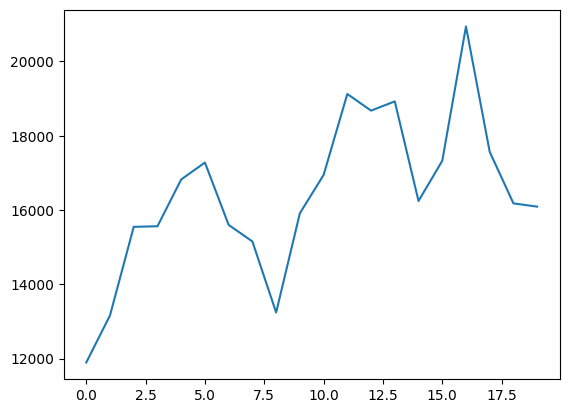

In [133]:
# Find the earliest and latest timestamps in sequential_interaction_list
from datetime import datetime

timestamps = [int(item[-1]) for item in sequential_interaction_list]  # Extract timestamps from the sequential_interaction_list

# Convert timestamps from seconds to datetime objects
timestamps = [datetime.fromtimestamp(timestamp) for timestamp in timestamps]

# Find the earliest and latest timestamps
earliest_timestamp = min(timestamps)
latest_timestamp = max(timestamps)

# Print the results in a human-readable format
print("Earliest Timestamp:", earliest_timestamp.strftime('%Y-%m-%d %H:%M:%S'))
print("Latest Timestamp:", latest_timestamp.strftime('%Y-%m-%d %H:%M:%S'))
timestamps = [int(item[-1]) for item in sequential_interaction_list]  # Extract timestamps from the sequential_interaction_list
earliest_timestamp = min(timestamps)
latest_timestamp = max(timestamps)
import datetime

# 假设min_time和max_time是您的日期时间字符串
min_time_human = "2014-03-01 00:00:00"
max_time_human = "2018-05-01 00:00:00"

# 将人类可读时间转换为UNIX时间戳
min_time_unix = int(datetime.datetime.strptime(min_time_human, '%Y-%m-%d %H:%M:%S').timestamp())
max_time_unix = int(datetime.datetime.strptime(max_time_human, '%Y-%m-%d %H:%M:%S').timestamp())

print(f"最小UNIX时间为: {min_time_unix}")
print(f"最大UNIX时间为: {max_time_unix}")

earliest_timestamp = min_time_unix
latest_timestamp = max_time_unix
total_period_num = 20
time_interval = (latest_timestamp - earliest_timestamp) / total_period_num
sample_interval_list = []
for i in range(total_period_num):
    time_low = earliest_timestamp + i * time_interval
    time_large = earliest_timestamp + (i + 1) * time_interval
    data_interval = [sample for sample in sequential_interaction_list if (sample[-1] < time_large and sample[-1] >= time_low)]
    data_interval_num = len(data_interval)
    sample_interval_list.append(data_interval_num)

    # for sample in sequential_interaction_list:
    #     if (sample[-1] < time_large and sample[-1] >= time_low):
    #         # sample.append(i) # the i denote the period num, append it to last

print(sample_interval_list)
print(sum(sample_interval_list))
import matplotlib.pyplot as plt
plt.plot(sample_interval_list)

In [134]:
import csv
# save the csv file for baselines
num_parts = 20
time_interval = (latest_timestamp - earliest_timestamp) / total_period_num
# part_size = len(sequential_interaction_list) // num_parts
for j in range(0,num_parts):
    with open(f'./all{j}.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerow(['user_id', 'history_timestamp', 'history_movie_id', 'history_movie_title', 'history_rating', 'movie_id', 'movie_title', 'rating', 'timestamp'])
        # start_index = j * part_size
        # end_index = start_index + part_size
        # part_data = sequential_interaction_list[start_index:end_index]
        time_low = earliest_timestamp + j * time_interval
        time_large = earliest_timestamp + (j + 1) * time_interval
        part_data = [sample for sample in sequential_interaction_list if (sample[-1] < time_large and sample[-1] >= time_low)]
        print(part_data == sorted(part_data, key = lambda x:x[-1]))
        print(len(part_data))
        writer.writerows(part_data)

True
11893
True
13161
True
15546
True
15562
True
16822
True
17277
True
15598
True
15152
True
13239
True
15911
True
16942
True
19124
True
18676
True
18924
True
16242
True
17323
True
20942
True
17566
True
16178
True
16090


In [135]:
for i in range(20):
    data = pd.read_csv(f'/data/shith/amazon_book/all{i}.csv')
    data = data.dropna(axis = 0)
    data.to_csv(f'/data/shith/amazon_book/all{i}.csv')
    null_counts = data.isnull().sum().sum()
    print(null_counts)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [136]:
def csv_to_csv(input_path, output_num):
    data = pd.read_csv(input_path)
    # import random
    train_data = data[:int(0.9 * data.shape[0])]
    val_data = data[int(0.9 * data.shape[0]):]
    test_data = data[:]
    j = output_num
    train_data.to_csv(f'./train{j}.csv')
    val_data.to_csv(f'./val{j}.csv')
    test_data.to_csv(f'./test{j}.csv')
for j in range(20):
    csv_to_csv(f'./all{j}.csv', j)

In [137]:
import json
def csv_to_json(input_path, output_path):
    data = pd.read_csv(input_path)
    # import random
    # seed = 2000
    # random.seed(seed)
    # random_indices = random.sample(range(part_size), 1000)
    # 从 part_data 中根据选取的索引获取对应的值
    # selected_values = [data[i] for i in random_indices]
    # part_data = data.iloc[random_indices]
    part_data = data.copy()
    json_list = []
    # print(part_data.max())
    part_data.sort_values(by = ['user_id', 'timestamp'], ascending= True,inplace=True)
    for index, row in part_data.iterrows():
        row['history_movie_id'] = eval(row['history_movie_id'])
        row['history_rating'] = eval(row['history_rating'])
        row['history_movie_title'] = eval(row['history_movie_title'])
        L = len(row['history_movie_id'])
        preference = []
        unpreference = []
        for i in range(L):
            if int(row['history_rating'][i]) == 1:
                preference.append(row['history_movie_title'][i])
                # preference.append(movie_id_to_name[int(row['history_movie_id'][i])])
            else:
                unpreference.append(row['history_movie_title'][i])
                # unpreference.append(movie_id_to_name[int(row['history_movie_id'][i])])
        target_movie = row['movie_title'] # movie_id_to_name[int(row['movie_id'])]
        preference_str = ""
        unpreference_str = ""
        for i in range(len(preference)):
            if i == 0:
                preference_str += "\"" + preference[i] + "\""
            else:
                preference_str += ", \"" + preference[i] + "\""
        for i in range(len(unpreference)):
            if i == 0:
                unpreference_str += "\"" + unpreference[i] + "\""
            else:
                unpreference_str += ", \"" + unpreference[i] + "\""
        target_preference = int(row['rating'])

        try:
            target_movie_str = "\"" + target_movie + "\""
        except:
            print(target_movie)
            continue
        # print(target_movie)
        target_preference_str = "Yes." if target_preference == 1 else "No."
        json_list.append({
            "instruction": "Given the user's preference and unpreference, identify whether the user will like the target book by answering \"Yes.\" or \"No.\".",
            "input": f"User Preference: {preference_str}\nUser Unpreference: {unpreference_str}\nWhether the user will like the target book {target_movie_str}?",
            "output": target_preference_str,
        })
        
    with open(output_path, 'w') as f:
        json.dump(json_list, f, indent=4)

In [138]:
for j in range(20):
    csv_to_json(f'./train{j}.csv', f'./train{j}.json')
    csv_to_json(f'./val{j}.csv', f'./val{j}.json')
    csv_to_json(f'./test{j}.csv', f'./test{j}.json')

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
